In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../HomeWork1/nyt.csv")
print(df.shape)
df.head()

(11519, 2)


,text,label
0,(reuters) - carlos tevez sealed his move to ju...,sports
1,if professional pride and strong defiance can ...,sports
2,"palermo, sicily — roberta vinci beat top-seede...",sports
3,spain's big two soccer teams face a pair of it...,sports
4,the argentine soccer club san lorenzo complete...,sports


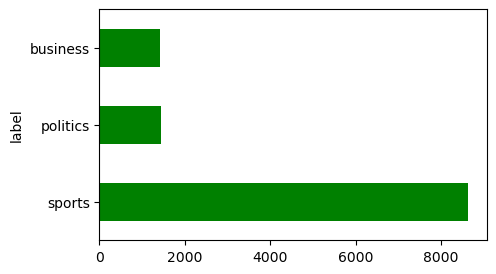

In [3]:
plt.figure(figsize=(5, 3))
df["label"].value_counts().plot(kind="barh", color="green")
plt.show()

In [4]:
def split_df(df, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    train_df, temp_df = train_test_split(df, test_size=(1 - train_size), random_state=random_state)
    val_df, test_df = train_test_split(temp_df, test_size=test_size / (val_size + test_size), random_state=random_state)
    return train_df, val_df, test_df

In [5]:
train_df, val_df, test_df = split_df(df)
print(train_df.shape, val_df.shape, test_df.shape)

(9215, 2) (1152, 2) (1152, 2)


In [6]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df["text"])
X_val = vectorizer.transform(val_df["text"])
X_test = vectorizer.transform(test_df["text"])

In [7]:
print(X_train.shape, X_val.shape, X_test.shape)

(9215, 61201) (1152, 61201) (1152, 61201)


In [8]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, train_df["label"])

LogisticRegression(max_iter=2000)

In [9]:
test_preds = model.predict(X_test)
accuracy = accuracy_score(test_df["label"], test_preds)
macro_f1 = f1_score(test_df["label"], test_preds, average="macro")
micro_f1 = f1_score(test_df["label"], test_preds, average="micro")

print(f"Accuracy Score: {accuracy}")
print(f"Macro F1-Score: {macro_f1}")
print(f"Micro F1-Score: {micro_f1}")

Accuracy Score: 0.9782986111111112
Macro F1-Score: 0.9440661087882298
Micro F1-Score: 0.9782986111111112
